# K-Means Implementation from scratch

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [13]:
X = make_blobs(n_samples=500,centers=3,n_features=2)[0]

In [14]:
df = pd.DataFrame(dict(x=X[:,0],y = X[:,1]))

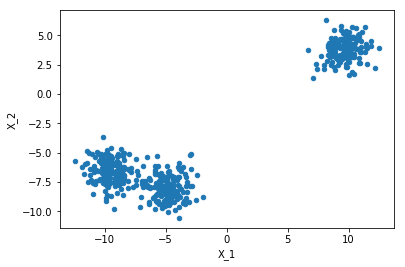

In [15]:
df.plot(kind='scatter',x='x',y='y')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [16]:
def init_centroids(x,k):
    centroids = []
    for i in range(k):
        cent_x = np.random.uniform(min(x[:,0]),max(x[:,0]))
        cent_y = np.random.uniform(min(x[:,1]),max(x[:,1]))
        centroids.append([cent_x,cent_y])
    return np.array(centroids)

In [17]:
def distance(a,b):
    return np.sqrt(sum(np.square(a-b))) 

In [18]:
def cluster_assignment(centroid,X):
    cluster=len(X)*[-1]
    for i in range(len(X)):
        dist_arr=[]
        for k in centroid:
            dist_arr.append(distance(X[i],k))
        cluster[i] = np.argmin(dist_arr)
    return np.array(cluster)

In [19]:
def update_cent(centroid,X,cluster):
    new_cent=[]
    for n in range(len(centroid)):
        arr=[]
        for i in range(len(cluster)):
            if n == cluster[i]:
                arr.append(X[i])
        new_cent.append(np.mean(arr,axis=0))
    return np.array(new_cent)

In [20]:
def stop_criteria(centroid,new_centroid):
    change = 0
    for a,b in zip(centroid,new_centroid):
        change += distance(a,b)
    return change

In [21]:
def show_clusters(X, cluster, cg):
    df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

K-Means

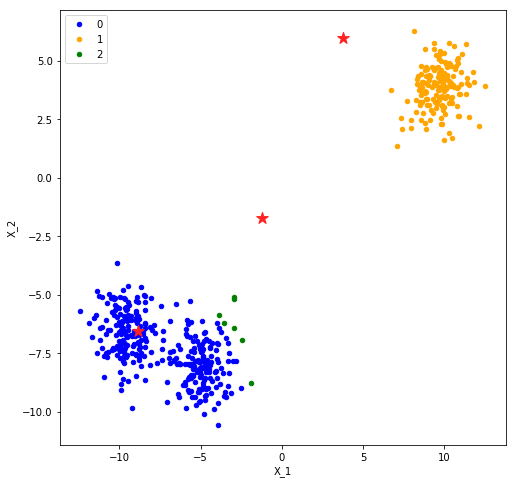

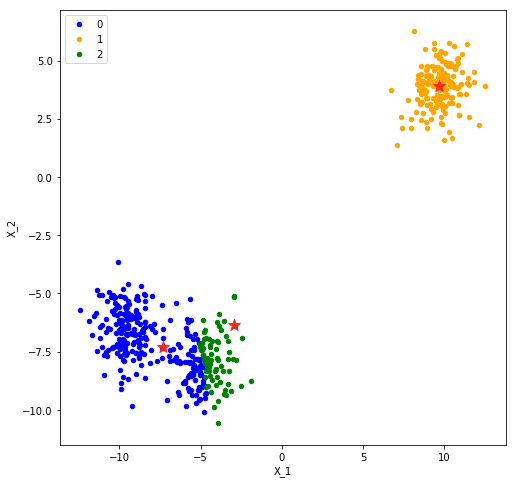

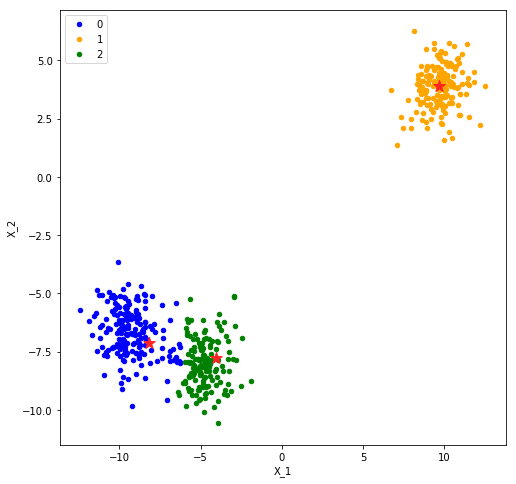

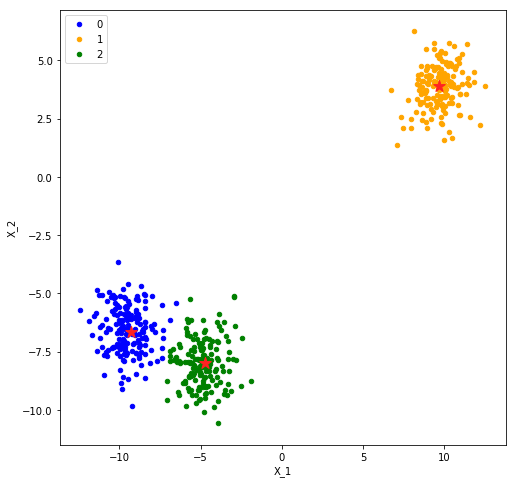

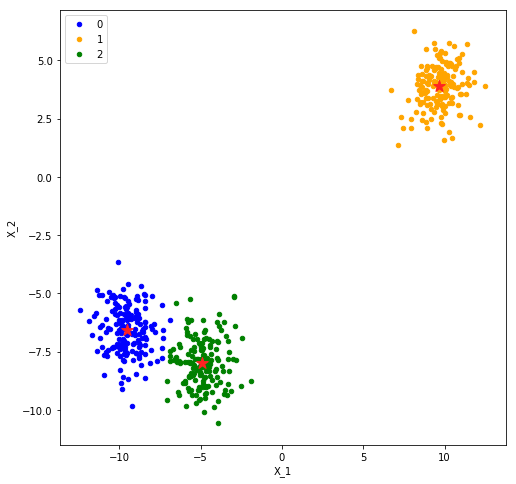

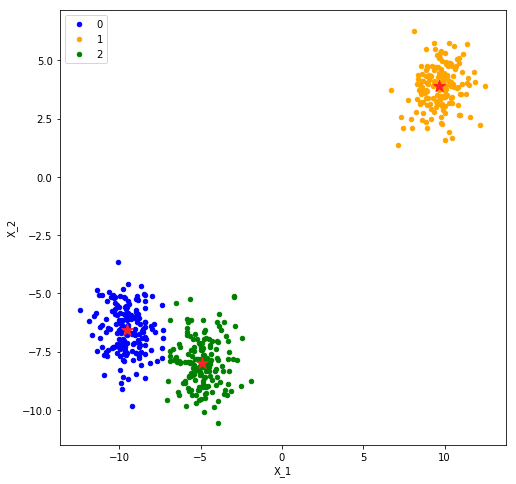

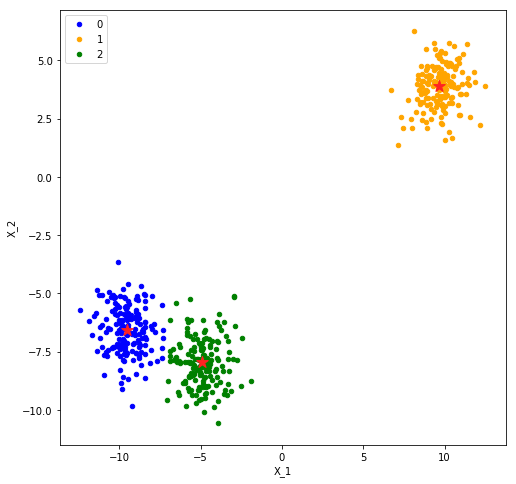

In [22]:
centroid = init_centroids(X,3)
cluster = [0]*len(X)
# show_clusters(X,cluster,centroid)
chng = 10
while chng > 0.001: 
    cluster = cluster_assignment(centroid,X)
    new_centroid = update_cent(centroid,X,cluster)
    show_clusters(X,cluster,centroid)
    chng = stop_criteria(centroid,new_centroid)
    centroid = new_centroid
